# <font color='Blue'>📦 Projeto: Modelagem do Tempo Total de Entrega</font>
<hr style='border: 2px solid Blue;'>

# <font color='orange' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid orange;'>

In [1]:
from src.functions import *
import warnings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings
# from pyspark.sql import SparkSession, Row 
# from pyspark.sql.functions import *
# import pyspark.sql.functions as F

# <font color='orange' style='font-size: 40px;'> 1. Leitura do Dataset </font>
<hr style='border: 2px solid orange;'>

https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center?resource=download

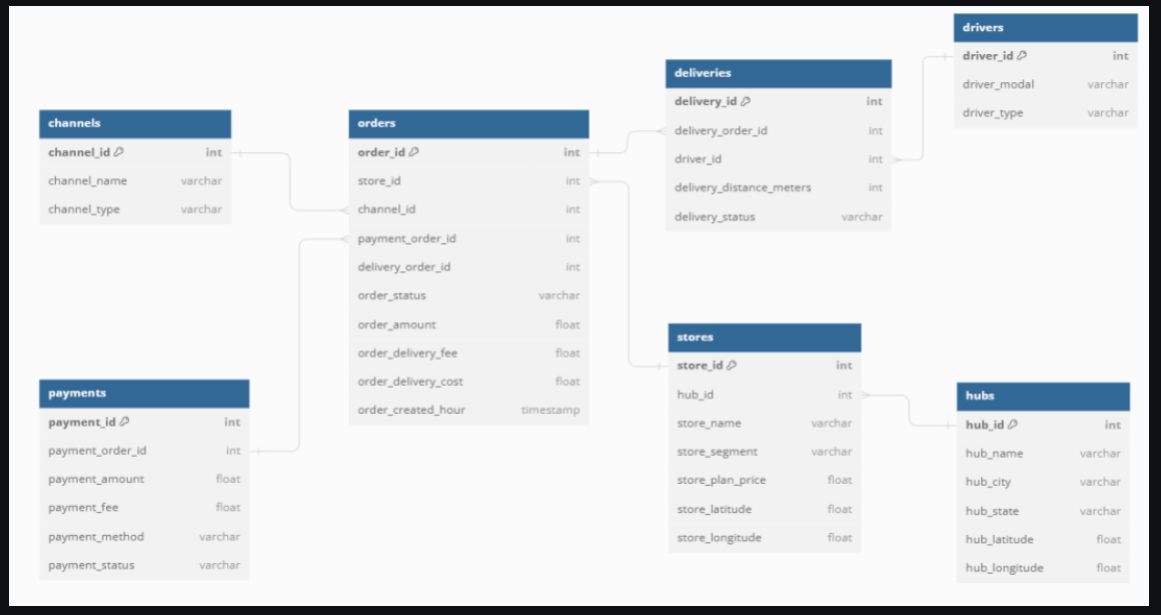


## 1.1.1) Channels

> 1. Este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os good e food de nossos lojistas.

- **Channel ID:** Identificador único do canal de vendas.
- **Channel Name:** Nome do canal de vendas.
- **Channel Type:** Tipo de canal de vendas.

## 1.1.2) Deliveries

> 1. Este dataset possui informações sobre as entregas realizadas por nossos entregadores parceiros.

- **Delivery Id:** Identificador único da entrega.
- **Delivery Order ID:** Identificador único do pedido.
- **Driver Id:** Identificador do entregador responsável pela entrega.
- **Delivery Distance Meters:** Distância total percorrida para a entrega, em metros.
- **Delivery Status:** Status atual da entrega.

## 1.1.3) Drivers

> 1. Este dataset possui informações sobre os entregadores parceiros. Eles ficam em nossos hubs e toda vez que um pedido é processado, são eles fazem as entregas na casa dos consumidores.

- **Driver Id:** Identificador único do entregador.
- **Driver Modal:** Modalidade de transporte utilizada pelo entregador.
- **Driver Type:** Tipo de entregador.

## 1.1.4) Hubs

> 1. Este dataset possui informações sobre os hubs do Delivery Center. Entenda que os Hubs são os centros de distribuição dos pedidos e é dali que saem as entregas.

- **Hub ID:** Identificador único do hub.
- **Hub Name:** Nome do hub.
- **Hub City:** Cidade onde o hub está localizado.
- **Hub State:** Estado onde o hub está localizado.
- **Hub Latitude:** Latitude da localização do hub.
- **Hub Longitude:** Longitude da localização do hub.

## 1.1.5) Orders

> 1. Este dataset possui informações sobre as vendas processadas através da plataforma do Delivery Center.

- **Delivery Order ID:** Identificador único do pedido.
- **Store ID:** Identificador da loja que recebeu o pedido.
- **Channel ID:** Identificador do canal pelo qual o pedido foi realizado.
- **Order Status:** Status atual do pedido.
- **Order Amount:** Valor total do pedido.
- **Order Delivery Fee:** Taxa de entrega cobrada ao cliente.
- **Order Delivery Cost:** Custo da entrega para a plataforma ou loja.
- **Order Created Hour:** Hora em que o pedido foi criado.
- **Order Created Minute:** Minuto em que o pedido foi criado.
- **Order Created Day:** Dia em que o pedido foi criado.
- **Order Created Month:** Mês em que o pedido foi criado.
- **Order Created Year:** Ano em que o pedido foi criado.
- **Order Moment Created:** Momento exato em que o pedido foi criado.
- **Order Moment Accepted:** Momento em que o pedido foi aceito pela loja.
- **Order Moment Ready:** Momento em que o pedido ficou pronto para entrega.
- **Order Moment Collected:** Momento em que o pedido foi coletado pelo entregador.
- **Order Moment In Expedition:** Momento em que o pedido entrou em expedição.
- **Order Moment Delivering:** Momento em que o pedido está sendo entregue.
- **Order Moment Delivered:** Momento em que o pedido foi entregue ao cliente.
- **Order Moment Finished:** Momento em que o pedido foi finalizado no sistema.

## 1.1.6) Payments

> 1. Este dataset possui informações sobre os pagamentos realizados ao Delivery Center.

- **Payment ID:** Identificador único do pagamento.
- **Delivery Order ID:** Identificador único do pedido.
- **Payment Amount:** Valor total pago pelo cliente.
- **Payment Fee:** Taxa de processamento do pagamento.
- **Payment Method:** Método de pagamento utilizado pelo cliente.
- **Payment Status:** Status atual do pagamento.

## 1.1.7) Stores

> 1. Este dataset possui informações sobre os lojistas. Eles utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.

- **Store ID:** Identificador único da loja.
- **Hub ID:** Identificador do hub ao qual a loja está associada.
- **Store Name:** Nome da loja.
- **Store Segment:** Segmento ou categoria da loja.
- **Store Plan Price:** Preço do plano de assinatura da loja na plataforma.
- **Store Latitude:** Latitude da localização da loja.
- **Store Longitude:** Longitude da localização da loja.


In [2]:
df_orders = (
    pd.read_csv('../Modelo_Delivery/data/orders.csv')
    .drop(['order_id', 'payment_order_id'], axis = 1)
    .rename(
        {
            'delivery_order_id':'delivery_order_id',
            'channel_id':'channel_id',
            'store_id':'store_id',
        },
        axis = 1
    )
)
df_channels = pd.read_csv('../Modelo_Delivery/data/channels.csv')
df_deliveries = pd.read_csv('../Modelo_Delivery/data/deliveries.csv')
df_drivers = pd.read_csv('../Modelo_Delivery/data/drivers.csv')
df_hubs = pd.read_csv('../Modelo_Delivery/data/hubs.csv', encoding='latin-1')
df_payments = pd.read_csv('../Modelo_Delivery/data/payments.csv').rename({'payment_order_id':'delivery_order_id'}, axis=1)
df_stores = pd.read_csv('../Modelo_Delivery/data/stores.csv', encoding='latin-1')

In [3]:
colunas_renomeadas = {
    # ------------------- ORDERS -------------------
    'store_id': 'id_loja',
    'channel_id': 'id_canal',
    'delivery_order_id': 'id_pedido_entrega',
    'order_status': 'status_pedido',
    'order_amount': 'valor_pedido',
    'order_delivery_fee': 'taxa_entrega_cliente',
    'order_delivery_cost': 'custo_entrega_plataforma',
    'order_created_hour': 'hora_criacao_pedido',
    'order_created_minute': 'minuto_criacao_pedido',
    'order_created_day': 'dia_criacao_pedido',
    'order_created_month': 'mes_criacao_pedido',
    'order_created_year': 'ano_criacao_pedido',
    'order_moment_created': 'momento_criacao_pedido',
    'order_moment_accepted': 'momento_aceite_pedido',
    'order_moment_ready': 'momento_pedido_pronto',
    'order_moment_collected': 'momento_pedido_coletado',
    'order_moment_in_expedition': 'momento_pedido_expedicao',
    'order_moment_delivering': 'momento_pedido_em_entrega',
    'order_moment_delivered': 'momento_pedido_entregue',
    'order_moment_finished': 'momento_pedido_finalizado',

    # Métricas de tempo do pedido
    'order_metric_collected_time': 'tempo_coleta_pedido',
    'order_metric_paused_time': 'tempo_pedido_pausado',
    'order_metric_production_time': 'tempo_producao_pedido',
    'order_metric_walking_time': 'tempo_deslocamento_pedido',
    'order_metric_expediton_speed_time': 'tempo_expedicao_pedido',
    'order_metric_transit_time': 'tempo_transito_pedido',
    'order_metric_cycle_time': 'tempo_ciclo_pedido',

    # ------------------- CHANNELS -------------------
    'channel_name': 'nome_canal',
    'channel_type': 'tipo_canal',

    # ------------------- PAYMENTS -------------------
    'payment_id': 'id_pagamento',
    'payment_amount': 'valor_pagamento',
    'payment_fee': 'taxa_pagamento',
    'payment_method': 'metodo_pagamento',
    'payment_status': 'status_pagamento',

    # ------------------- DELIVERIES -------------------
    'delivery_id': 'id_entrega',
    'driver_id': 'id_entregador',
    'delivery_distance_meters': 'distancia_entrega_metros',
    'delivery_status': 'status_entrega',

    # ------------------- STORES -------------------
    'store_name': 'nome_loja',
    'store_segment': 'segmento_loja',
    'store_plan_price': 'preco_plano_loja',
    'store_latitude': 'latitude_loja',
    'store_longitude': 'longitude_loja',

    # ------------------- DRIVERS -------------------
    'driver_modal': 'modal_entregador',
    'driver_type': 'tipo_entregador',

    # ------------------- HUBS -------------------
    'hub_id': 'id_hub',
    'hub_name': 'nome_hub',
    'hub_city': 'cidade_hub',
    'hub_state': 'estado_hub',
    'hub_latitude': 'latitude_hub',
    'hub_longitude': 'longitude_hub',
}


df_full = (
    df_orders
    .merge(df_channels, on='channel_id', how='left') # Merge OK
    .merge(df_payments, on='delivery_order_id', how='left') # Merge Ok
    .merge(df_deliveries, on='delivery_order_id', how='left')
    .merge(df_stores, on='store_id', how='left')
    .merge(df_drivers, on='driver_id', how='left')
    .merge(df_hubs, on='hub_id', how='left')
)

df_full.rename(columns=colunas_renomeadas, inplace=True)

tempos = [
    'momento_criacao_pedido', 'momento_aceite_pedido', 'momento_pedido_pronto',
    'momento_pedido_coletado', 'momento_pedido_expedicao', 'momento_pedido_em_entrega',
    'momento_pedido_entregue', 'momento_pedido_finalizado'
]

for col in tempos:
    df_full[col] = pd.to_datetime(df_full[col], errors='coerce')

df_full["data_pedido"] = df_full["momento_criacao_pedido"].dt.date
df_full["dia_semana"] = df_full["momento_criacao_pedido"].dt.day_name()
df_full["hora_pedido"] = df_full["momento_criacao_pedido"].dt.hour


df_target = df_full.copy()

display(df_target.shape)
df_target.head()

(442239, 54)

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub,data_pedido,dia_semana,hora_pedido
0,3512,5,68405119,CANCELED,62.70,0.00,NaN,0,1,1,1,2021,2021-01-01 00:01:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
1,3512,5,68405123,CANCELED,62.70,0.00,NaN,0,4,1,1,2021,2021-01-01 00:04:26,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
2,3512,5,68405206,CANCELED,115.50,0.00,NaN,0,13,1,1,2021,2021-01-01 00:13:07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
3,3401,5,68405465,CANCELED,55.90,0.00,NaN,0,19,1,1,2021,2021-01-01 00:19:15,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28,2021-01-01,Friday,0
4,3401,5,68406064,CANCELED,37.90,0.00,NaN,0,26,1,1,2021,2021-01-01 00:26:25,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28,2021-01-01,Friday,0


# <font color='orange' style='font-size: 40px;'> 2. Criação da Target </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar a Target e preparar as Amostras de Treino, Validação, Teste e Out-Of-Time

# <font color='green' style='font-size: 30px;'> 2.1) Criação da Target </font>
<hr style='border: 2px solid green;'>



In [4]:
df_target["tempo_entrega"] = (df_target["momento_pedido_finalizado"] - df_target["momento_aceite_pedido"]).dt.total_seconds() / 60
df_target = df_target.loc[(df_target["status_pedido"] == 'FINISHED') & (df_target["status_entrega"] == 'DELIVERED') & df_target["tempo_entrega"].between(15, 260)].copy()

📊 ANÁLISE PSI TEMPORAL
Período base: 2021-01-01 a 2021-02-01
Período atual: 2021-03-30 a 2021-04-30
Registros base: 82,280 | Registros atual: 124,265


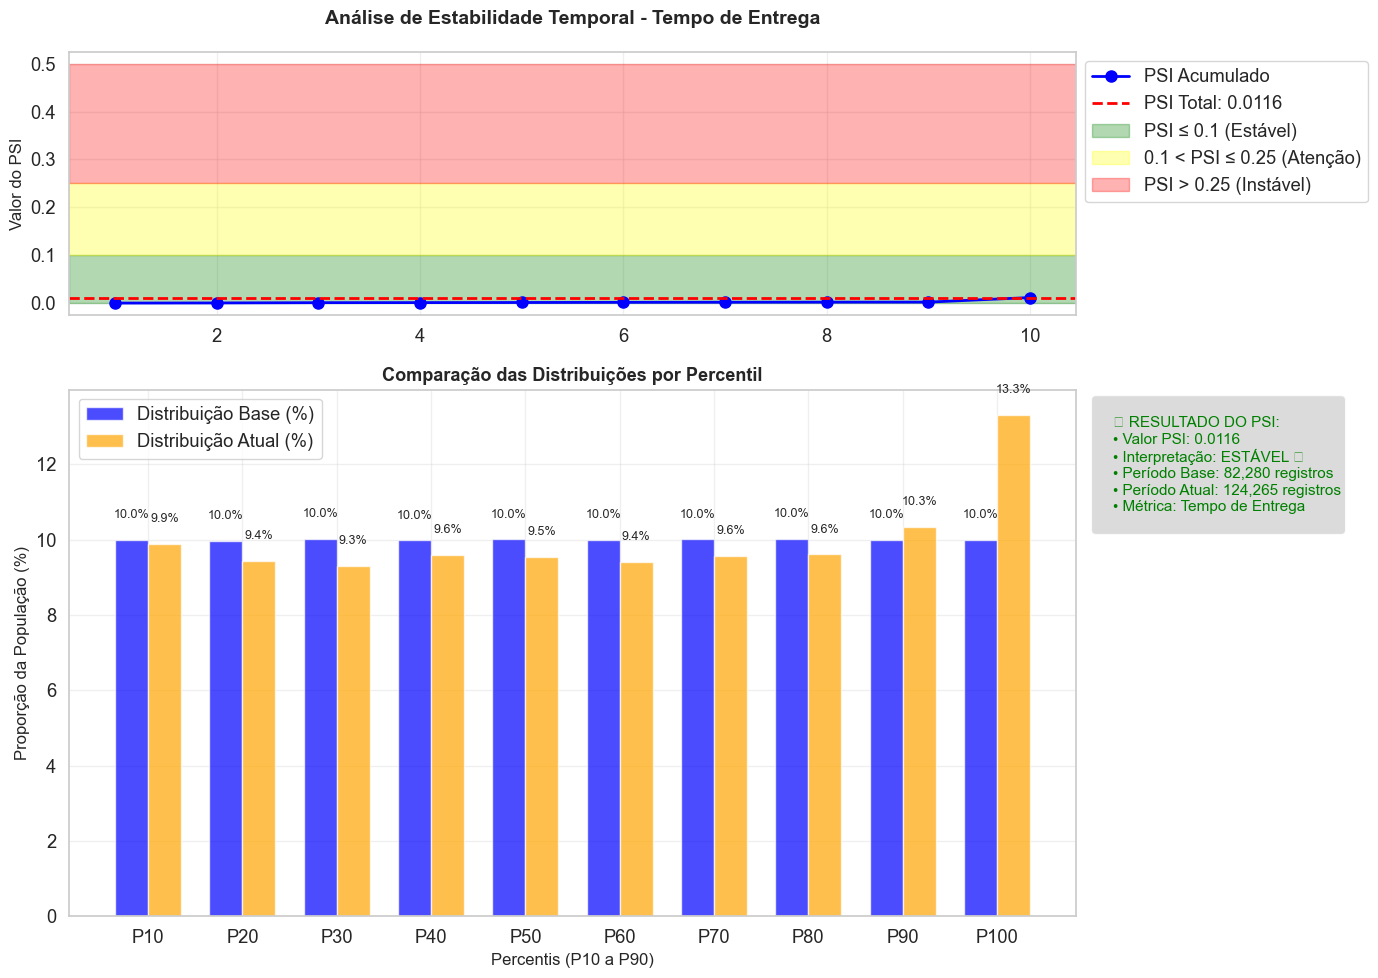


🎯 RESULTADO FINAL: PSI = 0.0116 - ESTÁVEL ✅


In [5]:
psi, detalhes = calcular_psi_temporal(df_target[['tempo_entrega', 'data_pedido']], 'data_pedido', 'tempo_entrega', 'Tempo de Entrega')

# <font color='green' style='font-size: 30px;'> 2.2) Criação da Spine </font>
<hr style='border: 2px solid green;'>

> 1. Existem ID duplicados, como o ID Pagamento. As linhas sao todas iguais, mas o que muda é o ID e o valor em alguns casos, algo muito estranho. 

> 2. Além disso, o ID Entrega também está estranho, uma vez que aparentemente há mais entregas que pedidos 

> 3. Como a ideia será modelar o tempo de entrega, a chave primária do problema será o ID Pedido Entrega, que se refere aos pedidos, sendo assim, removeu-se duplicatas mantendo o ID Pedido Entrega como chave primária

🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:
Quantidade de Registros: 395,770

id_loja único: 836 - Identificador único da loja.
id_canal único: 38 - Identificador único do canal de vendas.
id_pedido_entrega único: 327,765 - Identificador único do pedido de entrega.
id_pagamento único: 375,555 - Identificador único do pagamento.
id_entrega único: 345,393 - Identificador único da entrega.
id_entregador único: 4,530 - Identificador único do entregador.
id_hub único: 27 - Identificador único do hub.

Entregas com múltiplos pedidos: 0

Existem 55 variáveis no Dataset
Existem 31 variáveis sem registros nulos no Dataset


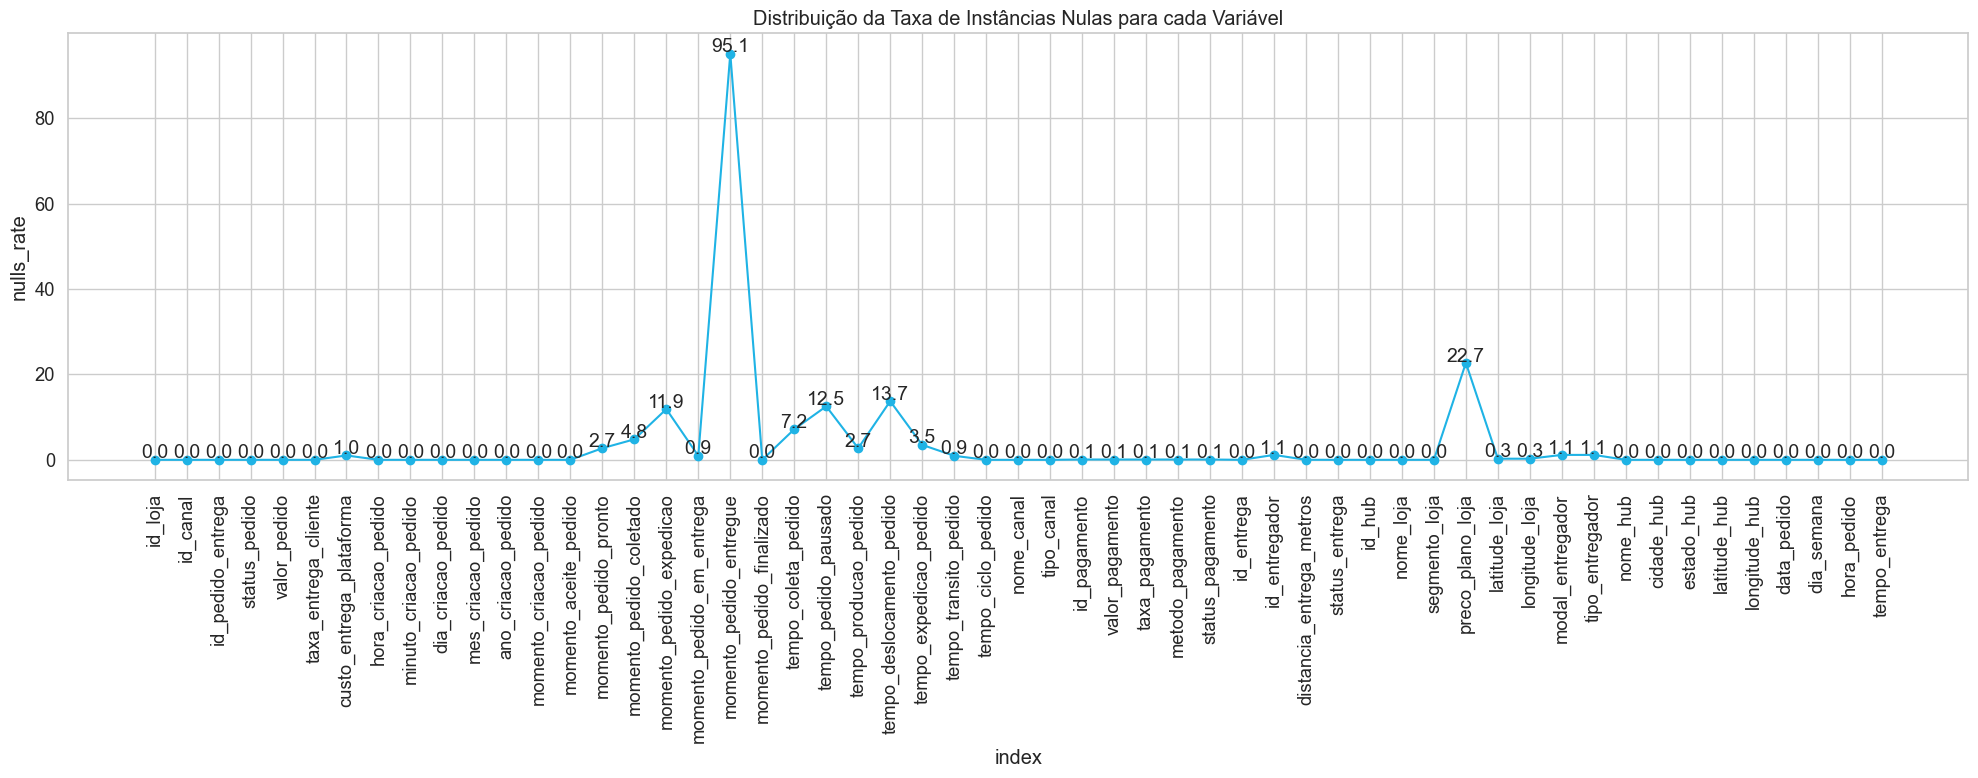

In [6]:
print("🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:")

print(f"Quantidade de Registros: {df_target.shape[0]:,}")
print()
print(f"id_loja único: {df_target['id_loja'].nunique():,} - Identificador único da loja.")
print(f"id_canal único: {df_target['id_canal'].nunique():,} - Identificador único do canal de vendas.")
print(f"id_pedido_entrega único: {df_target['id_pedido_entrega'].nunique():,} - Identificador único do pedido de entrega.")
print(f"id_pagamento único: {df_target['id_pagamento'].nunique():,} - Identificador único do pagamento.")
print(f"id_entrega único: {df_target['id_entrega'].nunique():,} - Identificador único da entrega.")
print(f"id_entregador único: {df_target['id_entregador'].nunique():,} - Identificador único do entregador.")
print(f"id_hub único: {df_target['id_hub'].nunique():,} - Identificador único do hub.")

# Verificar se há múltiplos pedidos_entrega para mesma entrega
pedidos_por_entrega = df_target.groupby('id_entrega')['id_pedido_entrega'].nunique()
print(f"\nEntregas com múltiplos pedidos: {(pedidos_por_entrega > 1).sum()}")
print()

# Análise de Nulos
df_nulls = (
    pd.DataFrame(
        df_target
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_target.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

- Explorando ID Pagamento 

In [17]:
df_target.loc[df_target['id_entrega'] == 3108733.00].drop_duplicates()

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub,data_pedido,dia_semana,hora_pedido,tempo_entrega
389731,56,5,90945484,FINISHED,42.40,6.90,12.00,23,15,17,4,2021,2021-04-17 23:15:28,2021-04-17 23:15:31,2021-04-17 23:34:05,2021-04-17 23:35:21,2021-04-17 23:35:22,2021-04-17 23:38:41,NaT,2021-04-17 23:50:24,1.25,3.32,18.62,1.27,4.60,11.72,34.92,FOOD PLACE,MARKETPLACE,5346921.00,39.30,0.59,ONLINE,PAID,3108733.00,NaN,827.00,DELIVERED,8,SUPSIO,FOOD,49.00,-22.92,-43.23,NaN,NaN,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.92,-43.23,2021-04-17,Saturday,23,34.88
389733,56,5,90945484,FINISHED,42.40,6.90,12.00,23,15,17,4,2021,2021-04-17 23:15:28,2021-04-17 23:15:31,2021-04-17 23:34:05,2021-04-17 23:35:21,2021-04-17 23:35:22,2021-04-17 23:38:41,NaT,2021-04-17 23:50:24,1.25,3.32,18.62,1.27,4.60,11.72,34.92,FOOD PLACE,MARKETPLACE,5346922.00,10.00,0.00,VOUCHER,PAID,3108733.00,NaN,827.00,DELIVERED,8,SUPSIO,FOOD,49.00,-22.92,-43.23,NaN,NaN,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.92,-43.23,2021-04-17,Saturday,23,34.88


- Definição da Spine 

In [20]:
# Primeiro, ordenar pelo valor_pagamento em ordem decrescente
# Assim, quando remover duplicatas, manterá o maior valor
df_sorted = df_target.sort_values('valor_pagamento', ascending=False).copy()

# Remover duplicatas mantendo a primeira ocorrência (que será a com maior valor_pagamento)
df_target_sem_duplicatas= df_sorted.drop_duplicates(subset='id_pedido_entrega', keep='first')

print(f"Linhas antes: {len(df_target)}")
print(f"Linhas depois: {len(df_target_sem_duplicatas)}")
print(f"Registros duplicados removidos: {len(df_target) - len(df_target_sem_duplicatas)}")

Linhas antes: 395770
Linhas depois: 327765
Registros duplicados removidos: 68005


In [23]:
print("🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:")

print(f"Quantidade de Registros: {df_target_sem_duplicatas.shape[0]:,}")
print()
print(f"id_loja único: {df_target_sem_duplicatas['id_loja'].nunique():,} - Identificador único da loja.")
print(f"id_canal único: {df_target_sem_duplicatas['id_canal'].nunique():,} - Identificador único do canal de vendas.")
print(f"id_pedido_entrega único: {df_target_sem_duplicatas['id_pedido_entrega'].nunique():,} - Identificador único do pedido de entrega.")
print(f"id_pagamento único: {df_target_sem_duplicatas['id_pagamento'].nunique():,} - Identificador único do pagamento.")
print(f"id_entrega único: {df_target_sem_duplicatas['id_entrega'].nunique():,} - Identificador único da entrega.")
print(f"id_entregador único: {df_target_sem_duplicatas['id_entregador'].nunique():,} - Identificador único do entregador.")
print(f"id_hub único: {df_target_sem_duplicatas['id_hub'].nunique():,} - Identificador único do hub.")

# Verificar se há múltiplos pedidos_entrega para mesma entrega
pedidos_por_entrega = df_target_sem_duplicatas.groupby('id_entrega')['id_pedido_entrega'].nunique()
print(f"\nEntregas com múltiplos pedidos: {(pedidos_por_entrega > 1).sum()}")
print()

🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:
Quantidade de Registros: 327,765

id_loja único: 836 - Identificador único da loja.
id_canal único: 38 - Identificador único do canal de vendas.
id_pedido_entrega único: 327,765 - Identificador único do pedido de entrega.
id_pagamento único: 327,510 - Identificador único do pagamento.
id_entrega único: 327,765 - Identificador único da entrega.
id_entregador único: 4,515 - Identificador único do entregador.
id_hub único: 27 - Identificador único do hub.

Entregas com múltiplos pedidos: 0



# <font color='green' style='font-size: 30px;'> 2.3) Criação das Amostras de Treino, Validação, Teste e Out-Of-Time </font>
<hr style='border: 2px solid green;'>

> 1. A fim de evitar Data Leakage, decidiu-se separar os dados em treino, validação, teste e oot

> 2. Para cenário, separou-se da seguinte maneira:

- Treino + Validação --> 80% dos IDs entre 202101 e 202103, sendo 90% para Treinamento do Modelo e 10% para Validação.
- Teste --> 20% dos IDs do treino
- OOT --> Todos os IDs para 202104
- '202101', --> TREINAMENTO/VALIDACAO/TESTE
- '202102', --> TREINAMENTO/VALIDACAO/TESTE
- '202103', --> TREINAMENTO/VALIDACAO/TESTE
- '202104', --> OOT

> 3. As distribuições da Variável Resposta são semelhantes no Treino, Validação, Teste e Out-of-Time



In [31]:
df_target_sem_duplicatas['safra'] = df_target_sem_duplicatas['momento_criacao_pedido'].dt.strftime('%Y%m')

amostra_treino_validacao = (
    df_target_sem_duplicatas
        .loc[~df_target_sem_duplicatas["safra"].isin(["202104"])]
        [["id_pedido_entrega"]]
        .drop_duplicates()
        .sample(frac = 0.8, random_state = 42, replace = False)
)

train = (
    amostra_treino_validacao.sample(frac = 0.9, random_state = 42, replace = False)
    [["id_pedido_entrega"]]
    .drop_duplicates()
) 

valid = (
    amostra_treino_validacao.loc[~amostra_treino_validacao["id_pedido_entrega"].isin(list(train["id_pedido_entrega"].unique()))]
    [["id_pedido_entrega"]]
    .drop_duplicates()
)

test = (
    df_target_sem_duplicatas
        .loc[
            (~df_target_sem_duplicatas["safra"].isin(["202104"])) & 
            (~df_target_sem_duplicatas["id_pedido_entrega"].isin(list(train["id_pedido_entrega"].unique()))) & 
            (~df_target_sem_duplicatas["id_pedido_entrega"].isin(list(valid["id_pedido_entrega"].unique())))
        ]
        [["id_pedido_entrega"]]
        .drop_duplicates()
)

oot = (
    df_target_sem_duplicatas
        .loc[
            (df_target_sem_duplicatas["safra"].isin(["202104"]))
        ]
        [["id_pedido_entrega"]]
        .drop_duplicates()
)

df_train = train.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_valid = valid.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_test = test.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_oot = oot.merge(df_target_sem_duplicatas.loc[df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")

print(f"A quantidade de amostras no Treino (202101~202103) é: {df_train.shape[0]}")
print(f"A quantidade de amostras na Validação (202101~202103) é: {df_valid.shape[0]}")
print(f"A quantidade de amostras no Teste (202101~202103) é: {df_test.shape[0]}")
print(f"A quantidade de amostras no OOT (202104) é: {df_oot.shape[0]}")

amostras = [df_train, df_valid, df_test, df_oot]
tipo = ["Treino", "Validação", "Teste", "OOT"]

A quantidade de amostras no Treino (202101~202103) é: 167204
A quantidade de amostras na Validação (202101~202103) é: 18578
A quantidade de amostras no Teste (202101~202103) é: 46446
A quantidade de amostras no OOT (202104) é: 95537



📊 ANALISANDO DISTRIBUIÇÃO DE: tempo_entrega

1. Gerando histogramas individuais...


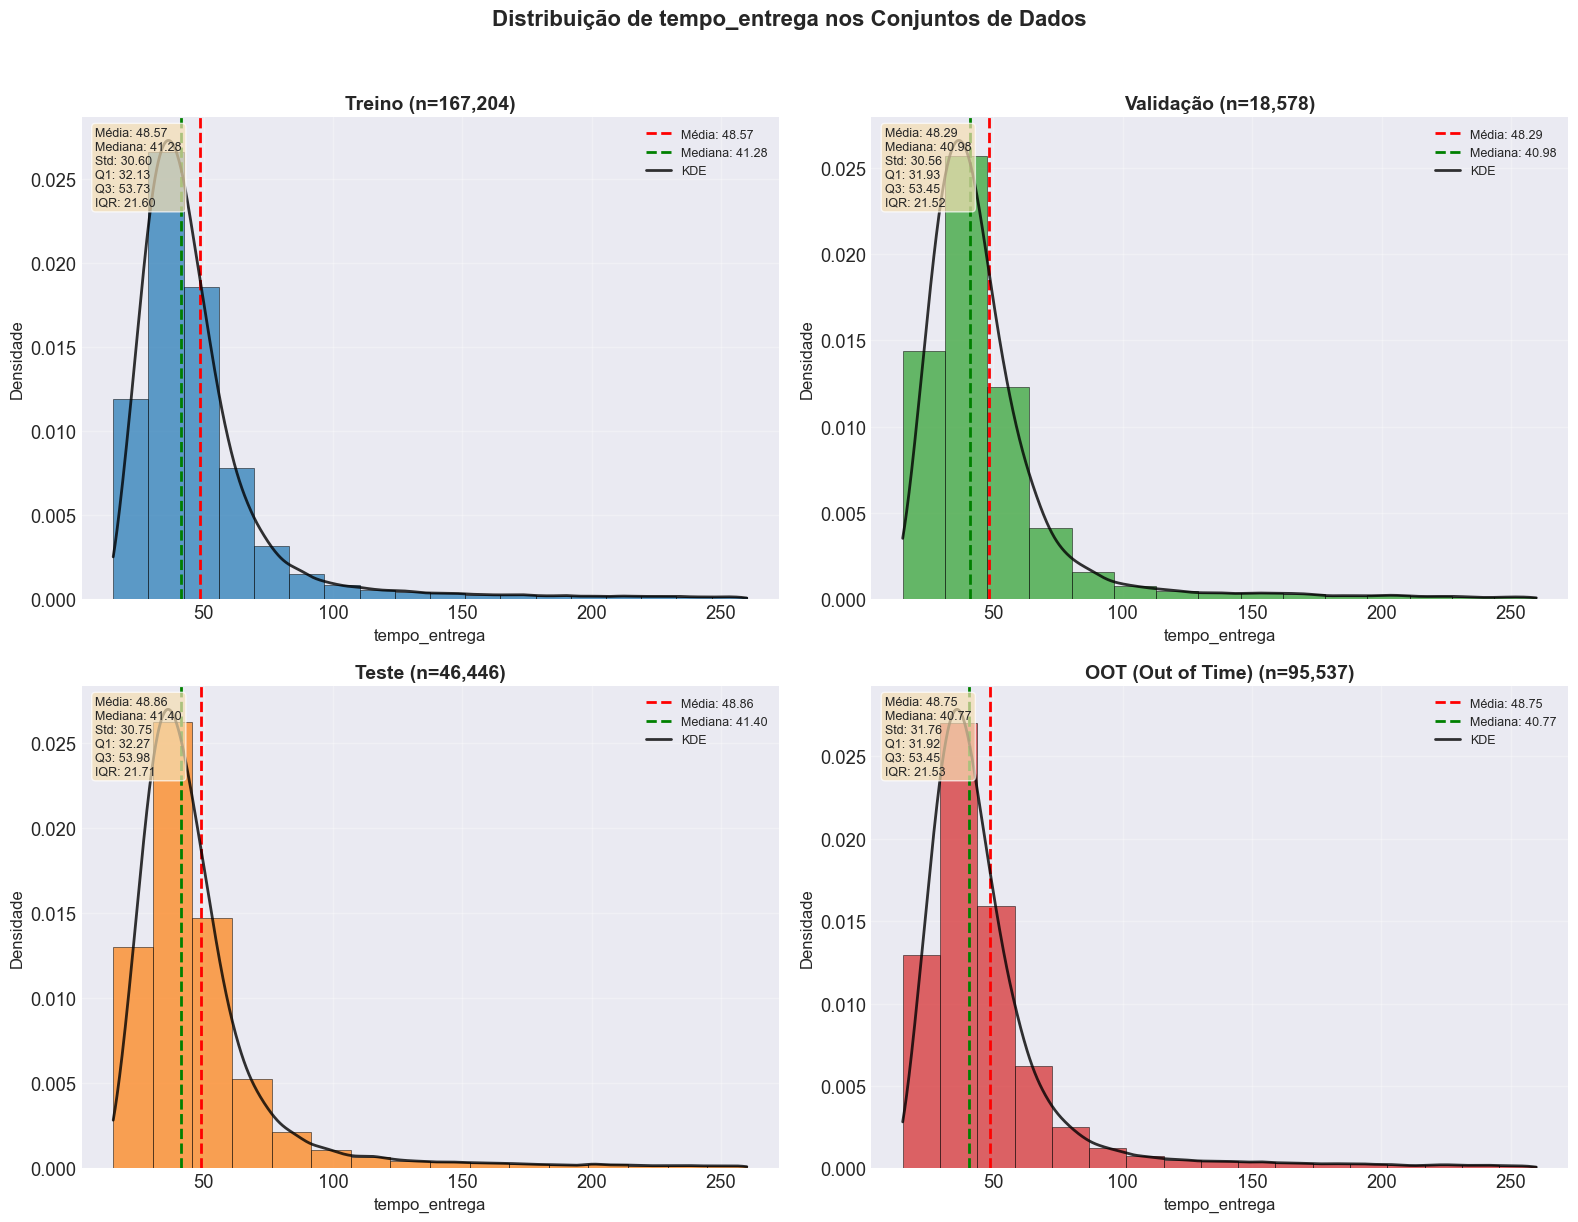


2. Gerando boxplot comparativo...


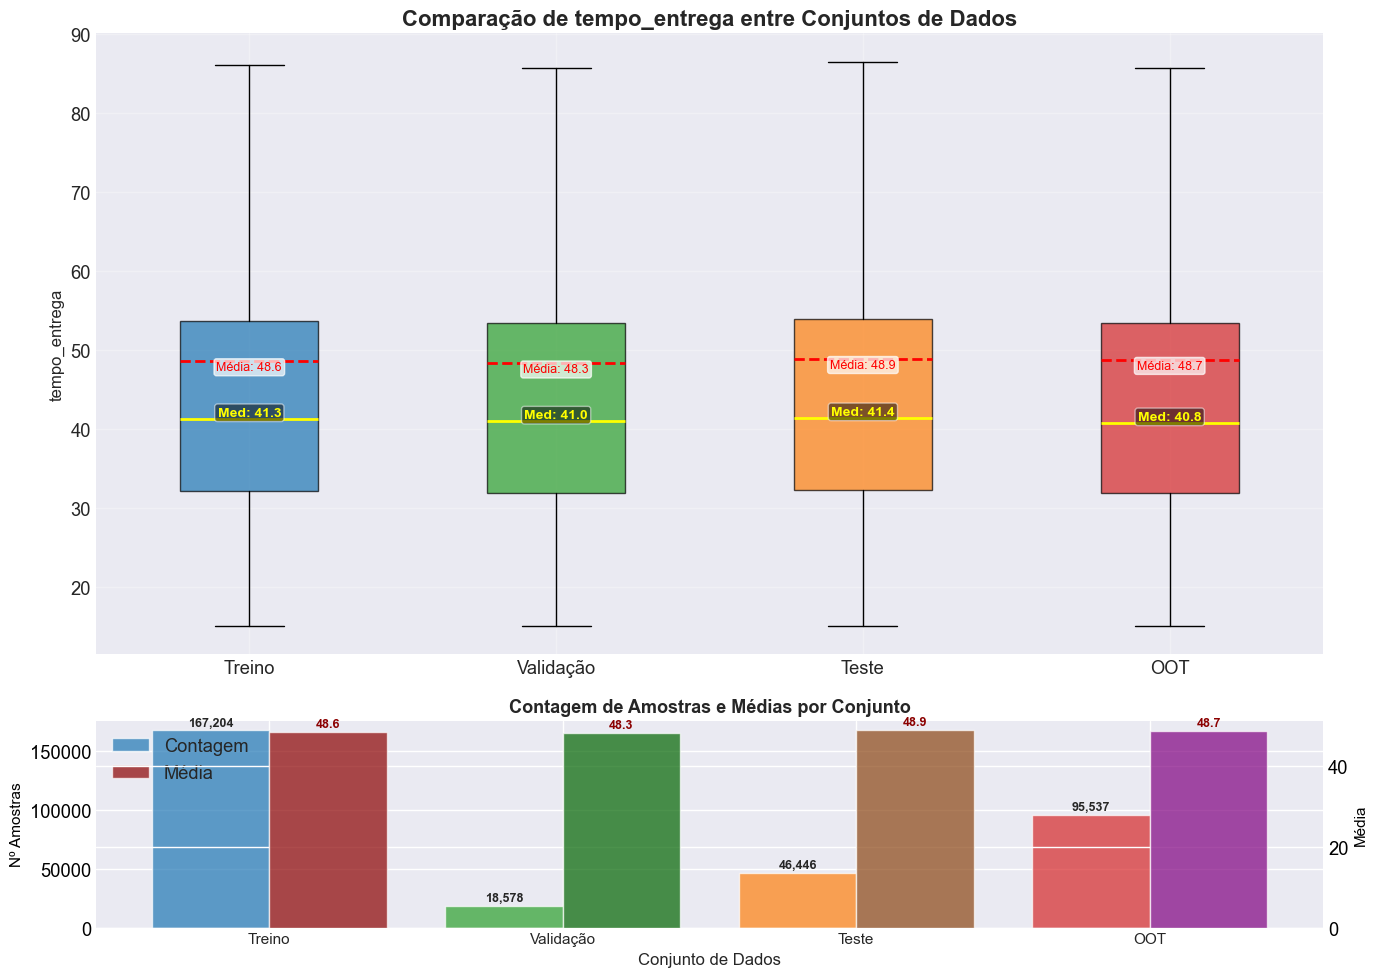


RESUMO ESTATÍSTICO - DISTRIBUIÇÃO DE TEMPO DE ENTREGA
 Conjunto Amostras Média Mediana   Std   Min    Max    Q1    Q3   IQR
   Treino  167,204 48.57   41.28 30.60 15.00 260.00 32.13 53.73 21.60
Validação   18,578 48.29   40.98 30.56 15.02 259.82 31.93 53.45 21.52
    Teste   46,446 48.86   41.40 30.75 15.00 259.98 32.27 53.98 21.71
      OOT   95,537 48.75   40.77 31.76 15.00 259.87 31.92 53.45 21.53

3. Gerando gráfico de densidade comparativo...


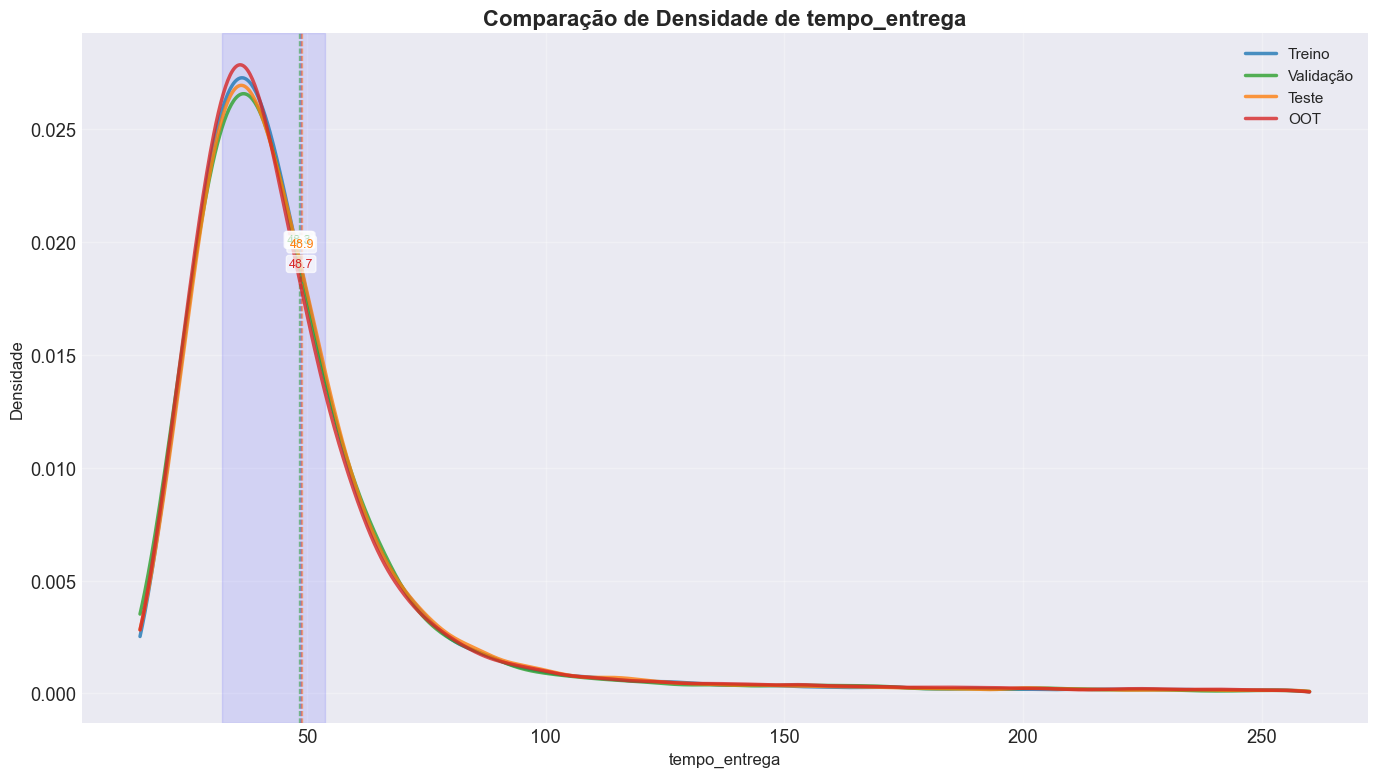

In [39]:
stats = visualize_all_comparisons(df_train, df_valid, df_test, df_oot, 'tempo_entrega')

In [ ]:
# df_train.to_csv('../Modelo_Delivery/data/df_train.csv', index=False)
# df_valid.to_csv('../Modelo_Delivery/data/df_valid.csv', index=False)
# df_test.to_csv('../Modelo_Delivery/data/df_test.csv', index=False)
# df_oot.to_csv('../Modelo_Delivery/data/df_oot.csv', index=False)

# <font color='orange' style='font-size: 40px;'> 3. Criação de Features </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar Features 

> **Pontos de Observação**: Trata-se de um problema de Interpolação, ou seja, embora tenhamos a série histórica de pedidos diários, os pedidos são dependentes apenas dentro de um mesmo dia e independentes em dias distintos. 

# Ideias de Feature Engineering para Previsão de Tempo de Entrega

Este documento consolida propostas de features conceitualmente fortes e de implementação simples, organizadas em quatro eixos: **Features Convencionais**, **Estatística Espacial**, **Séries Temporais** e **Grafos**.

---

## 1. Features Convencionais

### **1.1. Proporção de etapas do ciclo**
Mede a participação relativa de cada etapa (ex.: produção, deslocamento, expedição) no ciclo total do pedido.  
Ajuda a identificar gargalos específicos do pedido ou da operação da loja.

### **1.2. Tempo médio histórico de preparo da loja**
Média móvel dos tempos de produção de pedidos anteriores da mesma loja.  
Captura o ritmo operacional típico da loja.

### **1.3. Variabilidade do preparo da loja**
Desvio-padrão dos tempos de preparo da loja.  
Loja instável tende a gerar maior incerteza no tempo de entrega.

### **1.4. Taxa de atrasos da loja**
Percentual de pedidos da loja que excedem determinado SLA.  
Funciona como indicador de confiabilidade.

### **1.5. Velocidade média histórica do entregador**
Distância percorrida dividida pelo tempo de deslocamento ao longo do histórico.  
Modelo aprende a performance típica de cada entregador.

### **1.6. Estabilidade do entregador**
Desvio-padrão da velocidade ou do tempo de entrega do entregador.  
Entregadores mais instáveis criam maior volatilidade.

### **1.7. Complexidade do pedido**
Pode ser aproximada pelo valor do pedido ou por valor relativo ao preço médio da loja.  
Pedidos complexos geralmente demandam maior preparo.

### **1.8. Concentração operacional da loja**
Número de pedidos criados pela loja nos últimos minutos (fila instantânea).  
Captura sobrecarga operacional.

---

## 2. Features de Estatística Espacial

### **2.1. Densidade de pedidos no entorno da loja**
Número de pedidos próximos (ex.: raio de 1 km) criados recentemente.  
A densidade geográfica funciona como proxy de congestionamento urbano e operacional.

### **2.2. Tortuosidade do trajeto (distância reta vs. real)**
Razão entre a distância em linha reta e a distância real percorrida.  
Quanto maior a tortuosidade, mais complexo o trajeto e maior o tempo de entrega.

### **2.3. Variação de altitude loja → cliente**
Mesmo simples, mudanças de altitude influenciam entregas de bike ou patinete.  
Aclives aumentam tempo de deslocamento.

### **2.4. Distância loja → hub**
Ajuda a explicar logística interna ou micro-hubs descentralizados.

### **2.5. Cluster geográfico da loja**
Clusterização simples (ex.: K-means) baseada em latitude/longitude.  
Permite capturar padrões regionais não lineares de trânsito e demanda.

---

## 3. Features de Séries Temporais

### **3.1. Volume de pedidos nas últimas janelas de tempo**
Quantidade de pedidos por loja, hub ou região nos últimos 5, 10 ou 30 minutos.  
Indica pressão operacional imediata.

### **3.2. Crescimento ou queda de demanda (variação percentual)**
Mudança percentual entre o volume atual e a média das últimas janelas.  
Captura aceleração ou desaceleração da demanda.

### **3.3. Tamanho da fila atual da loja**
Número de pedidos ainda em preparo no momento da criação do pedido.  
Diretamente relacionado ao tempo de produção.

### **3.4. Tempo médio recente de entrega da loja**
Média dos tempos de entrega dos últimos N pedidos.  
Serve como indicador de performance instantânea.

### **3.5. Indicador de horário de pico**
Variável categórica ou binária indicando janelas como almoço (11h–14h) e jantar (18h–21h).  
A demanda e o trânsito aumentam nessas janelas.

### **3.6. Indicador de sazonalidade semanal**
Dia da semana como categoria.  
Segunda e sábado, por exemplo, têm dinâmicas muito diferentes.

### **3.7. Lag do tempo de entrega médio**
Tempo de entrega médio observado nas últimas janelas (ex.: últimos 30 min).  
Boa proxy de condições operacionais momentâneas.

---

## 4. Features Baseadas em Grafos

### **4.1. Centralidade espacial aproximada da loja**
Inverso da distância média da loja para todos os hubs.  
Lojas mais “centrais” tendem a ter rotas mais eficientes.

### **4.2. Grau da loja no grafo loja–entregador**
Número de entregadores únicos que já atenderam a loja.  
Lojas com baixo grau podem sofrer com disponibilidade limitada de entregadores.

### **4.3. Grau do entregador no grafo loja–entregador**
Número de lojas já atendidas pelo entregador.  
Entregadores multi-lojas tendem a ter rotas conhecidas e maior eficiência.

### **4.4. Frequência de repetição de arestas (loja → entregador)**
Mede quão frequentemente um entregador atende a mesma loja.  
Repetição tende a melhorar eficiência e reduzir variabilidade.

### **4.5. Peso médio das arestas (tempo médio da rota loja → destino)**
Tempo médio histórico para rotas específicas.  
Permite ao modelo aprender padrões específicos de trechos da cidade.

### **4.6. Comunidades logísticas**
Clusters formados por lojas que compartilham entregadores.  
Capturam dinâmicas de operação semelhantes não explicadas apenas por geografia.

---



In [2]:
df_train = pd.read_csv('../Modelo_Delivery/data/df_train.csv')
df_valid = pd.read_csv('../Modelo_Delivery/data/df_valid.csv')
df_test = pd.read_csv('../Modelo_Delivery/data/df_test.csv')
df_oot = pd.read_csv('../Modelo_Delivery/data/df_oot.csv')

# <font color='green' style='font-size: 30px;'> 3.1) Criação das Features Convencionais </font>
<hr style='border: 2px solid green;'>



In [3]:
df_train.columns

Index(['id_pedido_entrega', 'id_loja', 'id_canal', 'status_pedido',
       'valor_pedido', 'taxa_entrega_cliente', 'custo_entrega_plataforma',
       'hora_criacao_pedido', 'minuto_criacao_pedido', 'dia_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido', 'momento_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_coleta_pedido',
       'tempo_pedido_pausado', 'tempo_producao_pedido',
       'tempo_deslocamento_pedido', 'tempo_expedicao_pedido',
       'tempo_transito_pedido', 'tempo_ciclo_pedido', 'nome_canal',
       'tipo_canal', 'id_pagamento', 'valor_pagamento', 'taxa_pagamento',
       'metodo_pagamento', 'status_pagamento', 'id_entrega', 'id_entregador',
       'distancia_entrega_metros', 'status_entrega', 'id_hub', 'nome_loja',
       'segmento_loja', 'preco_plano_loja', 'lat

In [ ]:
df_feat = df_train.copy()

# ===============================================================
# 1. PROPORÇÃO DAS ETAPAS DO CICLO
# ===============================================================
etapas = [
    'tempo_coleta_pedido',
    'tempo_pedido_pausado',
    'tempo_producao_pedido',
    'tempo_deslocamento_pedido',
    'tempo_expedicao_pedido',
    'tempo_transito_pedido'
]

for etapa in etapas:
    df_feat[f'prop_{etapa}'] = df_feat[etapa] / df_feat['tempo_ciclo_pedido'].replace(0, np.nan)

# ===============================================================
# 2. TEMPO MÉDIO HISTÓRICO DE PREPARO DA LOJA
#    (rolling de 50 pedidos anteriores, por exemplo)
# ===============================================================
df_feat = df_feat.sort_values(['id_loja', 'momento_criacao_pedido'])

df_feat['loja_tempo_producao_media'] = (
    df_feat
    .groupby('id_loja')['tempo_producao_pedido']
    .transform(lambda x: x.rolling(window=50, min_periods=5).mean())
)

# ===============================================================
# 3. VARIABILIDADE DO PREPARO DA LOJA (desvio-padrão)
# ===============================================================
df_feat['loja_tempo_producao_std'] = (
    df_feat
    .groupby('id_loja')['tempo_producao_pedido']
    .transform(lambda x: x.rolling(window=50, min_periods=5).std())
)

# ===============================================================
# 4. TAXA DE ATRASOS DA LOJA
#    Supondo SLA de 40 minutos (ajuste conforme sua regra)
# ===============================================================
SLA = 40 * 60  # em segundos

df_feat['atrasado'] = (df_feat['tempo_entrega'] > SLA).astype(int)

df_feat['taxa_atrasos_loja'] = (
    df_feat
    .groupby('id_loja')['atrasado']
    .transform(lambda x: x.rolling(window=200, min_periods=20).mean())
)

# ===============================================================
# 5. VELOCIDADE MÉDIA HISTÓRICA DO ENTREGADOR
#    velocidade = distancia / tempo_de_deslocamento
# ===============================================================
df_feat['vel_entregador'] = df_feat['distancia_entrega_metros'] / df_feat['tempo_transito_pedido'].replace(0, np.nan)

df_feat['vel_entregador_media'] = (
    df_feat
    .groupby('id_entregador')['vel_entregador']
    .transform(lambda x: x.rolling(window=70, min_periods=10).mean())
)

# ===============================================================
# 6. ESTABILIDADE DO ENTREGADOR (variabilidade da velocidade)
# ===============================================================
df_feat['vel_entregador_std'] = (
    df_feat
    .groupby('id_entregador')['vel_entregador']
    .transform(lambda x: x.rolling(window=70, min_periods=10).std())
)

# ===============================================================
# 7. COMPLEXIDADE DO PEDIDO
#    Valor do pedido / valor médio da loja
# ===============================================================
df_feat['valor_medio_loja'] = (
    df_feat
    .groupby('id_loja')['valor_pedido']
    .transform('mean')
)

df_feat['complexidade_pedido'] = df_feat['valor_pedido'] / df_feat['valor_medio_loja'].replace(0, np.nan)

# ===============================================================
# 8. CONCENTRAÇÃO OPERACIONAL DA LOJA (fila instantânea)
#    Número de pedidos criados nas últimas X horas
# ===============================================================

# Conversão para datetime caso necessário
df_feat['momento_criacao_pedido'] = pd.to_datetime(df_feat['momento_criacao_pedido'])

df_feat = df_feat.sort_values(['id_loja', 'momento_criacao_pedido'])

# janela de 30 minutos
window_minutes = 30

df_feat['fila_loja_30min'] = (
    df_feat
    .groupby('id_loja')
    .rolling(f'{window_minutes}T', on='momento_criacao_pedido')
    .size()
    .reset_index(level=0, drop=True)
)

# Remove variável auxiliar
df_feat.drop(columns=['atrasado'], inplace=True)

df_feat.head()


# <font color='green' style='font-size: 30px;'> 3.2) Criação das Features de Estatística Espacial </font>
<hr style='border: 2px solid green;'>



In [ ]:
df_spatial = df_train.copy()

# ===============================================================
# 1. DISTÂNCIA ENTRE LOJA E HUB (em metros, via Haversine)
# ===============================================================

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # raio da Terra em metros
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = (
        np.sin(dlat / 2)**2 
        + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    )
    return R * 2 * np.arcsin(np.sqrt(a))

df_spatial['distancia_loja_hub'] = haversine(
    df_spatial['latitude_loja'],
    df_spatial['longitude_loja'],
    df_spatial['latitude_hub'],
    df_spatial['longitude_hub']
)

# ===============================================================
# 2. TORTUOSIDADE APROXIMADA DO TRAJETO
#    Distância reta / distância real (já disponível: distancia_entrega_metros)
# ===============================================================

# distância reta loja → cliente (aproximação via Haversine)
# você não tem latitude/longitude do cliente, então usamos HUB como proxy simples

df_spatial['distancia_reta'] = df_spatial['distancia_loja_hub']

df_spatial['tortuosidade'] = (
    df_spatial['distancia_reta'] 
    / df_spatial['distancia_entrega_metros'].replace(0, np.nan)
)

# ===============================================================
# 3. DENSIDADE DE PEDIDOS NO ENTORNO DA LOJA
#    Contagem de pedidos no raio (aprox. por vizinhos mais próximos)
# ===============================================================

df_spatial = df_spatial.sort_values('momento_criacao_pedido')
df_spatial['momento_criacao_pedido'] = pd.to_datetime(df_spatial['momento_criacao_pedido'])

# janela temporal de 30 minutos
window = '30T'

# Para cada loja, conta pedidos criados nos últimos 30 min
df_spatial['densidade_pedidos_loja'] = (
    df_spatial
    .groupby('id_loja')
    .rolling(window, on='momento_criacao_pedido')
    .size()
    .reset_index(level=0, drop=True)
)

# ===============================================================
# 4. CLUSTER GEOGRÁFICO DA LOJA (agrupamento espacial KMeans)
# ===============================================================

coords = df_spatial[['latitude_loja', 'longitude_loja']].drop_duplicates()

kmeans = KMeans(n_clusters=10, n_init='auto', random_state=42)
coords['cluster_geo_loja'] = kmeans.fit_predict(coords[['latitude_loja', 'longitude_loja']])

# merge de volta
df_spatial = df_spatial.merge(
    coords[['latitude_loja', 'longitude_loja', 'cluster_geo_loja']],
    on=['latitude_loja', 'longitude_loja'],
    how='left'
)

# ===============================================================
# 5. DISTÂNCIA LOJA → CENTROIDE DO HUB (proxy de centralidade)
# ===============================================================

# centroide do hub no dataset
lat_centroide = df_spatial['latitude_hub'].mean()
lon_centroide = df_spatial['longitude_hub'].mean()

df_spatial['distancia_loja_centroide_hub'] = haversine(
    df_spatial['latitude_loja'],
    df_spatial['longitude_loja'],
    lat_centroide,
    lon_centroide
)

# ===============================================================
# 6. CLASSIFICAÇÃO SIMPLES POR QUADRANTE ESPACIAL DA CIDADE
#    Ajuda a capturar diferenças grosseiras de regiões (N, S, L, O)
# ===============================================================

# dividir por mediana da latitude e longitude
lat_med = df_spatial['latitude_loja'].median()
lon_med = df_spatial['longitude_loja'].median()

def quadrante(lat, lon, lat_cut, lon_cut):
    if lat >= lat_cut and lon >= lon_cut:
        return "NE"
    elif lat >= lat_cut and lon < lon_cut:
        return "NW"
    elif lat < lat_cut and lon >= lon_cut:
        return "SE"
    else:
        return "SW"

df_spatial['quadrante_loja'] = df_spatial.apply(
    lambda row: quadrante(row['latitude_loja'], row['longitude_loja'], lat_med, lon_med),
    axis=1
)

df_spatial.head()


# <font color='green' style='font-size: 30px;'> 3.3) Criação das Features de Séries Temporais </font>
<hr style='border: 2px solid green;'>



In [ ]:
# -----------------------------------------------------------
# 1) Pressuposto: o DataFrame chama df_time_series e já está carregado
# -----------------------------------------------------------
# Certifique-se de que existe uma coluna temporal adequada
df_time_series = df_train.sort_values(['id_loja', 'data_pedido'])

# Caso a coluna 'data_pedido' não esteja como datetime:
df_time_series['data_pedido'] = pd.to_datetime(df_time_series['data_pedido'])

# -----------------------------------------------------------
# 2) Features de LAGS do tempo de entrega
# -----------------------------------------------------------
# Lags por loja (importante para capturar comportamento temporal da operação)
df_time_series['lag_tempo_entrega_1'] = df_time_series.groupby('id_loja')['tempo_entrega'].shift(1)
df_time_series['lag_tempo_entrega_3'] = df_time_series.groupby('id_loja')['tempo_entrega'].shift(3)
df_time_series['lag_tempo_entrega_7'] = df_time_series.groupby('id_loja')['tempo_entrega'].shift(7)

# -----------------------------------------------------------
# 3) Features de Médias Móveis
# -----------------------------------------------------------
df_time_series['mm_tempo_entrega_3'] = df_time_series.groupby('id_loja')['tempo_entrega'].rolling(3).mean().reset_index(level=0, drop=True)
df_time_series['mm_tempo_entrega_7'] = df_time_series.groupby('id_loja')['tempo_entrega'].rolling(7).mean().reset_index(level=0, drop=True)
df_time_series['mm_tempo_entrega_14'] = df_time_series.groupby('id_loja')['tempo_entrega'].rolling(14).mean().reset_index(level=0, drop=True)

# -----------------------------------------------------------
# 4) Variações Percentuais
# -----------------------------------------------------------
df_time_series['var_pct_tempo_entrega'] = (
    df_time_series.groupby('id_loja')['tempo_entrega']
      .pct_change()
)

# -----------------------------------------------------------
# 5) Estatísticas Rolling (Desvio, Mediana, Máximo, Mínimo)
# -----------------------------------------------------------
df_time_series['rolling_std_7'] = (
    df_time_series.groupby('id_loja')['tempo_entrega']
      .rolling(7).std()
      .reset_index(level=0, drop=True)
)

df_time_series['rolling_median_7'] = (
    df_time_series.groupby('id_loja')['tempo_entrega']
      .rolling(7).median()
      .reset_index(level=0, drop=True)
)

df_time_series['rolling_max_7'] = (
    df_time_series.groupby('id_loja')['tempo_entrega']
      .rolling(7).max()
      .reset_index(level=0, drop=True)
)

df_time_series['rolling_min_7'] = (
    df_time_series.groupby('id_loja')['tempo_entrega']
      .rolling(7).min()
      .reset_index(level=0, drop=True)
)

# -----------------------------------------------------------
# 6) Features de Sazonalidade (derivadas do timestamp)
# -----------------------------------------------------------
df_time_series['dia_do_mes'] = df_time_series['data_pedido'].dt.day
df_time_series['semana_do_ano'] = df_time_series['data_pedido'].dt.isocalendar().week.astype(int)
df_time_series['is_fim_semana'] = df_time_series['dia_semana'].isin([5, 6]).astype(int)

# Ciclos sazonais codificados como seno e cosseno
df_time_series['hora_sin'] = np.sin(2 * np.pi * df_time_series['hora_pedido'] / 24)
df_time_series['hora_cos'] = np.cos(2 * np.pi * df_time_series['hora_pedido'] / 24)

df_time_series['dia_semana_sin']


# <font color='green' style='font-size: 30px;'> 3.4) Criação das Features de Grafos </font>
<hr style='border: 2px solid green;'>



In [ ]:
# -----------------------------------------------------------
# Pressuposto: df é o DataFrame original já carregado
# -----------------------------------------------------------

# -----------------------------------------------------------
# 1) Criação do Grafo
# -----------------------------------------------------------

G = nx.DiGraph()

# -----------------------
# Adicionar nós (lojas)
# -----------------------
for _, row in df[['id_loja', 'latitude_loja', 'longitude_loja']].drop_duplicates().iterrows():
    G.add_node(
        f"loja_{row['id_loja']}",
        tipo="loja",
        latitude=row['latitude_loja'],
        longitude=row['longitude_loja']
    )

# -----------------------
# Adicionar nós (hubs)
# -----------------------
for _, row in df[['id_hub', 'latitude_hub', 'longitude_hub']].drop_duplicates().iterrows():
    G.add_node(
        f"hub_{row['id_hub']}",
        tipo="hub",
        latitude=row['latitude_hub'],
        longitude=row['longitude_hub']
    )

# -----------------------
# Adicionar nós (entregadores)
# -----------------------
for entregador in df['id_entregador'].dropna().unique():
    G.add_node(
        f"entregador_{entregador}",
        tipo="entregador"
    )

# -----------------------
# Adicionar arestas Loja → Hub
# -----------------------
edges_loja_hub = df[['id_loja', 'id_hub', 'distancia_entrega_metros', 
                     'tempo_transito_pedido']].dropna()

for _, row in edges_loja_hub.iterrows():
    G.add_edge(
        f"loja_{row['id_loja']}",
        f"hub_{row['id_hub']}",
        distancia=row['distancia_entrega_metros'],
        tempo_transito=row['tempo_transito_pedido']
    )

# -----------------------
# Adicionar arestas Hub → Entregador
# -----------------------
for _, row in df[['id_hub', 'id_entregador']].dropna().iterrows():
    G.add_edge(
        f"hub_{row['id_hub']}",
        f"entregador_{row['id_entregador']}"
    )

# -----------------------------------------------------------
# 2) Centralidades dos nós
# -----------------------------------------------------------

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
df_dc = pd.DataFrame(degree_centrality.items(), columns=['node', 'degree_centrality'])

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
df_bc = pd.DataFrame(betweenness_centrality.items(), columns=['node', 'betweenness_centrality'])

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
df_cc = pd.DataFrame(closeness_centrality.items(), columns=['node', 'closeness_centrality'])

# Agrupar métricas em uma única tabela
df_nodes = (
    df_dc
    .merge(df_bc, on='node', how='left')
    .merge(df_cc, on='node', how='left')
)

# -----------------------------------------------------------
# 3) Anexar centralidades ao DataFrame original
# -----------------------------------------------------------

# Criar variáveis normalizadas de mapeamento para loja, hub e entregador
df_nodes['id'] = df_nodes['node'].str.extract(r'_(.*)$')
df_nodes['categoria'] = df_nodes['node'].str.extract(r'^(.*?)_')

# Função de mapeamento
def attach_node_feature(df, df_nodes, category, key_column, feature_name):
    sub = df_nodes[df_nodes['categoria'] == category][['id', feature_name]].rename(columns={'id': key_column})
    return df.merge(sub, on=key_column, how='left')

# Degree centrality
df = attach_node_feature(df, df_nodes, "loja", "id_loja", "degree_centrality")
df = attach_node_feature(df, df_nodes, "hub", "id_hub", "degree_centrality")
df = attach_node_feature(df, df_nodes, "entregador", "id_entregador", "degree_centrality")

# Betweenness centrality
df = attach_node_feature(df, df_nodes, "loja", "id_loja", "betweenness_centrality")
df = attach_node_feature(df, df_nodes, "hub", "id_hub", "betweenness_centrality")
df = attach_node_feature(df, df_nodes, "entregador", "id_entregador", "betweenness_centrality")

# Closeness centrality
df = attach_node_feature(df, df_nodes, "loja", "id_loja", "closeness_centrality")
df = attach_node_feature(df, df_nodes, "hub", "id_hub", "closeness_centrality")
df = attach_node_feature(df, df_nodes, "entregador", "id_entregador", "closeness_centrality")

# Renomear para clareza
df.rename(columns={
    'degree_centrality': 'centralidade_degree',
    'betweenness_centrality': 'centralidade_betweenness',
    'closeness_centrality': 'centralidade_closeness'
}, inplace=True)

# -----------------------------------------------------------
# 4) Features de Arestas – Média de Pesos por Loja e Hub
# -----------------------------------------------------------

# Média da distância por loja
df['distancia_media_loja'] = df.groupby('id_loja')['distancia_entrega_metros'].transform('mean')

# Média do tempo de trânsito por loja
df['transito_medio_loja'] = df.groupby('id_loja')['tempo_transito_pedido'].transform('mean')

# Média do tempo de trânsito por hub
df['transito_medio_hub'] = df.groupby('id_hub')['tempo_transito_pedido'].transform('mean')

# Quantidade de entregadores por hub
df['entregadores_por_hub'] = df.groupby('id_hub')['id_entregador'].transform('nunique')

# -----------------------------------------------------------
# 5) Conectividade local
# -----------------------------------------------------------

# Número de lojas que um hub atende (grau de entrada do hub)
hub_in_degree = {n.replace("hub_", ""): d for n, d in G.in_degree() if n.startswith("hub_")}

df['hubs_in_degree'] = df['id_hub'].map(hub_in_degree)

# Número de hubs aos quais a loja está conectada
loja_out_degree = {n.replace("loja_", ""): d for n, d in G.out_degree() if n.startswith("loja_")}

df['lojas_out_degree'] = df['id_loja'].map(loja_out_degree)

# -----------------------------------------------------------
# Limpeza final
# -----------------------------------------------------------
df = df.reset_index(drop=True)

print("Features de Grafos criadas com sucesso!")


# <font color='orange' style='font-size: 40px;'> 4. Modelagem </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar o Modelo e Otimizar 